In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/ML-1/finalizedcrimedata.csv')

print(data)

                      Area_Name  Year                 Group_Name  \
0     Andaman & Nicobar Islands  2014                       Rape   
1                Andhra Pradesh  2014                       Rape   
2             Arunachal Pradesh  2014                       Rape   
3                         Assam  2014                       Rape   
4                         Bihar  2014                       Rape   
...                         ...   ...                        ...   
4160                 Tamil Nadu  2023  Total Crime Against Women   
4161                    Tripura  2023  Total Crime Against Women   
4162              Uttar Pradesh  2023  Total Crime Against Women   
4163                Uttarakhand  2023  Total Crime Against Women   
4164                West Bengal  2023  Total Crime Against Women   

                      Sub_Group_Name  Cases_Acquitted_or_Discharged  \
0                           01. Rape                              5   
1                           01. Rape     

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'
crime_data = pd.read_csv(file_path)

# Step 1: Drop irrelevant columns ('Unnamed: 22')
crime_data = crime_data.drop(['Unnamed: 22'], axis=1)

# Step 2: Handle missing values (if any)
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':  # If column is categorical
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:  # If column is numerical
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Step 3: Encode categorical variables ('Area_Name', 'Group_Name', 'Sub_Group_Name')
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Group_Name'] = label_encoder.fit_transform(crime_data['Group_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Step 4: Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Step 5: Sort the columns in a specific order
ordered_columns = ['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
                   'Cases_Acquitted_or_Discharged', 'Cases_Chargesheeted',
                   'Cases_Convicted', 'Cases_Reported', 'Total_Cases_for_Trial']

# Reorder the dataframe columns
crime_data = crime_data[ordered_columns]

# Display the preprocessed data in the specified order
crime_data.head()


,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_Chargesheeted,Cases_Convicted,Cases_Reported,Total_Cases_for_Trial
0,-1.683251,-1.5571,0.723719,-1.590323,-0.839900,-0.311291,-0.234317,-0.328771,-0.291380
1,-1.584236,-1.5571,0.723719,-1.590323,-0.194580,0.084025,0.138443,0.045964,0.017928
2,-1.485221,-1.5571,0.723719,-1.590323,-0.843456,-0.299938,-0.230533,-0.315819,-0.265124
3,-1.386207,-1.5571,0.723719,-1.590323,-0.547462,-0.057381,-0.043206,0.022651,-0.038426
4,-1.287192,-1.5571,0.723719,-1.590323,-0.483463,0.040674,0.058972,0.053303,0.104274


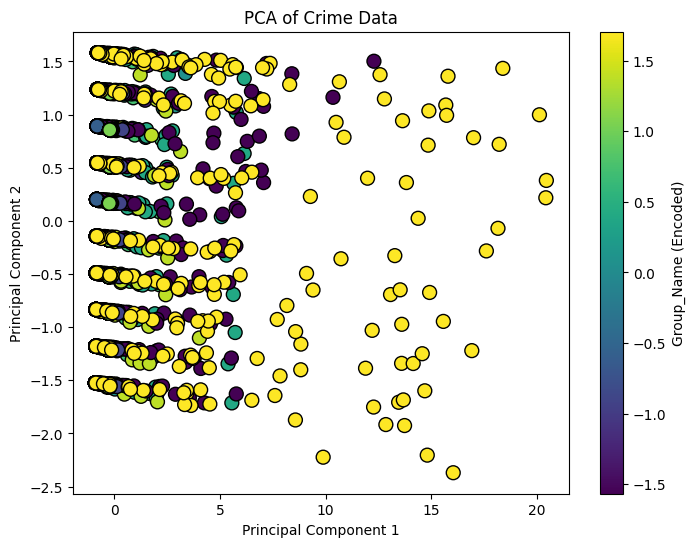

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'
crime_data = pd.read_csv(file_path)

# Preprocessing Steps
# Step 1: Drop irrelevant columns ('Unnamed: 22')
crime_data = crime_data.drop(['Unnamed: 22'], axis=1)

# Step 2: Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Step 3: Encode categorical variables ('Area_Name', 'Group_Name', 'Sub_Group_Name')
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Group_Name'] = label_encoder.fit_transform(crime_data['Group_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Step 4: Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Feature Extraction
# Step 5: Manual Feature Selection
# Choose features relevant to crime statistics (based on your dataset)
selected_features = ['Year', 'Cases_Acquitted_or_Discharged', 'Cases_Chargesheeted',
                     'Cases_Convicted', 'Cases_Reported', 'Total_Cases_for_Trial']

X = crime_data[selected_features]  # Feature matrix
y = crime_data['Group_Name']       # Target variable (encoded)

# Step 6: Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Step 7: Visualizing the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Crime Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Group_Name (Encoded)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'
crime_data = pd.read_csv(file_path)

# Preprocessing Steps
# Step 1: Drop irrelevant columns ('Unnamed: 22')
crime_data = crime_data.drop(['Unnamed: 22'], axis=1)

# Step 2: Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Step 3: Encode categorical variables ('Area_Name', 'Group_Name', 'Sub_Group_Name')
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Group_Name'] = label_encoder.fit_transform(crime_data['Group_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Encode the target variable (Group_Name as an example)
crime_data['Group_Name'] = label_encoder.fit_transform(crime_data['Group_Name'])

# Check unique values in the target variable
print("Unique values in target variable 'Group_Name':", crime_data['Group_Name'].unique())

# Step 4: Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Feature Selection
features = crime_data.drop('Group_Name', axis=1)  # Features
target = crime_data['Group_Name'].astype(int)     # Ensure the target variable is of integer type

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check unique values in y_train
print("Unique values in y_train:", y_train.unique())

# Step 6: Build and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier
classifier.fit(X_train, y_train)

# Save the trained model and test data for evaluation
trained_model = classifier
test_data = (X_test, y_test)


Unique values in target variable 'Group_Name': [ 7  5  1  6  9  0  3  2  4  8 10]
Unique values in y_train: [ 0 -1  1]


Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       134
           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       209

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833



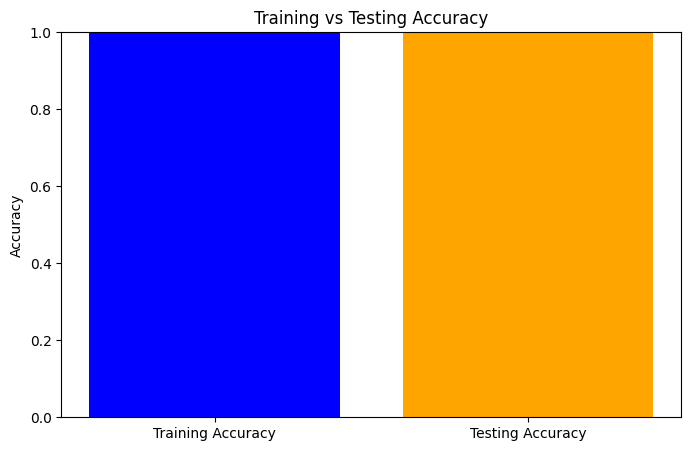

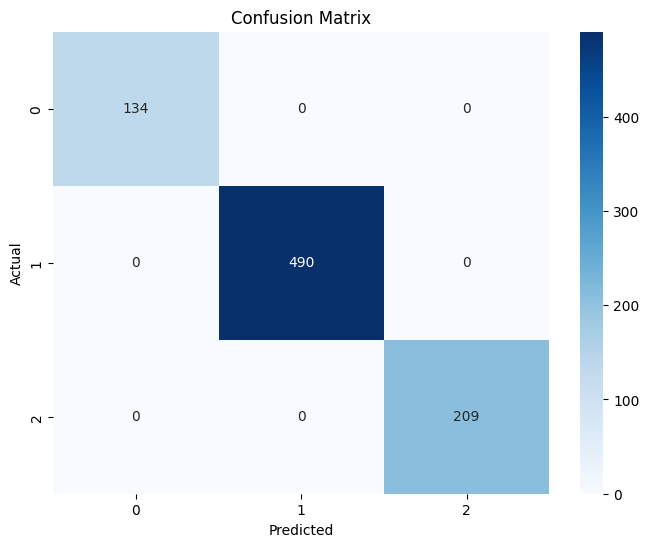

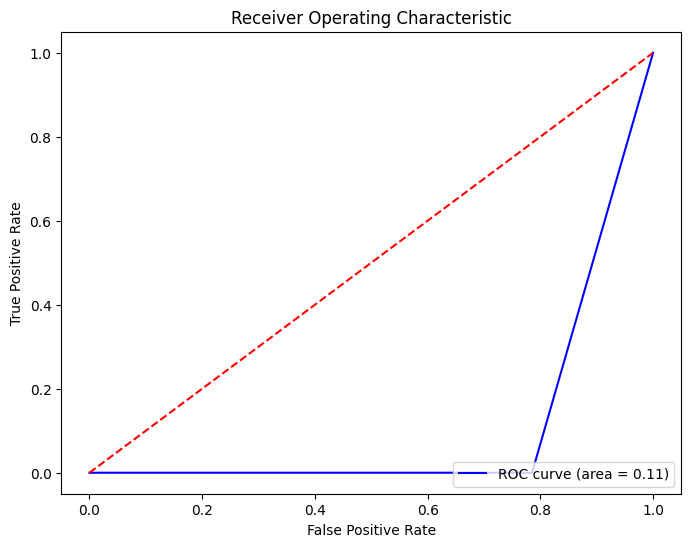

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'  # Path to your uploaded file
crime_data = pd.read_csv(file_path)

# Preprocessing Steps
# Step 1: Drop irrelevant columns ('Unnamed: 22')
crime_data = crime_data.drop(['Unnamed: 22'], axis=1)

# Step 2: Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Step 3: Encode categorical variables ('Area_Name', 'Group_Name', 'Sub_Group_Name')
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Group_Name'] = label_encoder.fit_transform(crime_data['Group_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Step 4: Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Step 5: Feature Selection
features = crime_data.drop('Group_Name', axis=1)  # Features (excluding the target variable 'Group_Name')
target = crime_data['Group_Name'].astype(int)     # Target variable

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Build and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 8: Predictions
y_pred = classifier.predict(X_test)

# Step 9: Evaluation
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display classification report
print("Classification Report:\n", report)

# Plotting Training and Testing Accuracy
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

# Create a bar plot for accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Step 10: Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 11: ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # For classification

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'  # Path to your uploaded file
crime_data = pd.read_csv(file_path)

# Step 1: Drop irrelevant columns ('Unnamed: 22')
crime_data = crime_data.drop(['Unnamed: 22'], axis=1)

# Step 2: Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Step 3: Encode categorical variables ('Area_Name', 'Sub_Group_Name')
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Step 4: Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Step 5: Feature Selection
features = crime_data.drop(['Group_Name'], axis=1)  # Features (exclude the target 'Group_Name')
target = crime_data['Group_Name']                   # Target variable (Group_Name)

# Encode target variable (if necessary)
target = label_encoder.fit_transform(target)  # Convert 'Group_Name' to numerical values

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Build and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 8: Predictions
y_pred = classifier.predict(X_test)

# Display accuracy
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Testing Accuracy: 1.0


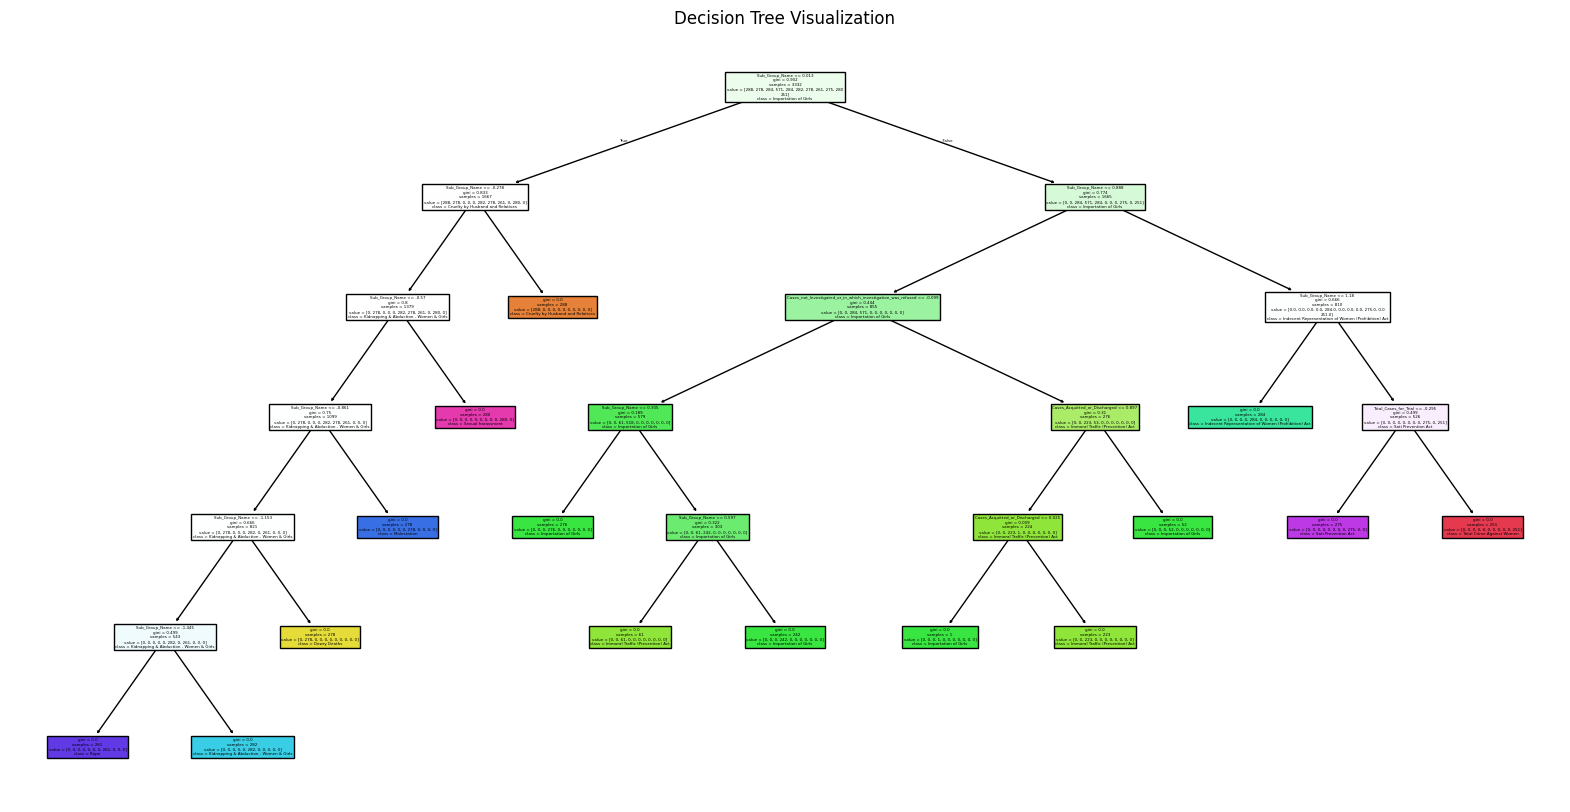

In [ ]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Custom KNN function to predict for one data point
def knn_predict_single(X_train, y_train, input_values, k=5):
    distances = []
    # Calculate the distance between the input and each training point
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], input_values)
        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [distances[i][1] for i in range(k)]

    # Majority vote
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]

# Function to simulate a prediction on the crime dataset
def check_prediction(X_train, y_train, k=5):
    # Simulate input feature values based on your provided values (e.g., 15, 20, 20, 2, 2, etc.)
    # Adjust the values to the number of features in your dataset
    simulated_input_values = np.array([15, 20, 20, 2, 2, 2, 0, 2, 0, 52, 0, 21])  # Example input, modify as needed

    # Ensure the input array matches the number of features
    simulated_input_values = simulated_input_values[:X_train.shape[1]]  # Truncate if too long

    # Predict class using custom KNN
    prediction = knn_predict_single(X_train, y_train, simulated_input_values, k=k)
    print(f"Predicted class for input values: {prediction}")

# Preprocessing steps for your finalizedcrimedata.csv dataset

# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'
crime_data = pd.read_csv(file_path)

# Drop any irrelevant columns (adjust accordingly)
crime_data = crime_data.drop(['Unnamed: 22'], axis=1, errors='ignore')

# Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Encode categorical variables
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Define features and target
features = crime_data.drop('Group_Name', axis=1)  # Features
target = crime_data['Group_Name']  # Target variable

# Encode the target variable
target = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Call the check_prediction function to simulate KNN prediction
check_prediction(X_train.values, y_train, k=5)


ValueError: operands could not be broadcast together with shapes (21,) (12,) 

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Custom KNN function to predict for one data point
def knn_predict_single(X_train, y_train, input_values, k=5):
    distances = []
    # Calculate the distance between the input and each training point
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], input_values)
        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [distances[i][1] for i in range(k)]

    # Majority vote
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]

# Function to simulate a prediction on the crime dataset
def check_prediction(X_train, y_train, k=5):
    # Simulate input feature values based on your provided values (e.g., 15, 20, 20, 2, 2, etc.)
    # Adjust the values to the number of features in your dataset
    # The original simulated_input_values had 12 elements, but X_train has 21 features.
    # We need to adjust the number of elements in simulated_input_values to match X_train.
    # I'm adding some placeholder values to match the number of features, but
    # you should replace these with actual or estimated values for your features.
    simulated_input_values = np.array([15, 20, 20, 2, 2, 2, 0, 2, 0, 52, 0, 21,
                                       0, 0, 0, 0, 0, 0, 0, 0, 0])  # Added placeholder values

    # Ensure the input array matches the number of features
    simulated_input_values = simulated_input_values[:X_train.shape[1]]  # Truncate if too long

    # Predict class using custom KNN
    prediction = knn_predict_single(X_train, y_train, simulated_input_values, k=k)
    print(f"Predicted class for input values: {prediction}")

# ... (rest of your code remains the same)

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Custom KNN function to predict for one data point
def knn_predict_single(X_train, y_train, input_values, k=5):
    distances = []
    # Calculate the distance between the input and each training point
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], input_values)
        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [distances[i][1] for i in range(k)]

    # Majority vote
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]

# Function to take inputs and make predictions
def input_and_predict(X_train, y_train, feature_names, k=5):
    print("Enter feature values based on the following feature names:")

    # Display feature names for the user to input
    user_input = []
    for i, feature in enumerate(feature_names):
        feature_value = float(input(f"Enter the value for {feature}: "))
        user_input.append(feature_value)

    # Convert the input list into a numpy array
    input_values = np.array(user_input)

    # Ensure the input matches the number of features
    if len(input_values) != X_train.shape[1]:
        raise ValueError(f"Expected {X_train.shape[1]} feature values, but got {len(input_values)}")

    # Predict class using custom KNN
    prediction = knn_predict_single(X_train, y_train, input_values, k=k)
    print(f"Predicted class for the input values is: {prediction}")

# Preprocessing steps for your finalizedcrimedata.csv dataset
# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'
crime_data = pd.read_csv(file_path)

# Drop irrelevant columns (adjust accordingly)
crime_data = crime_data.drop(['Unnamed: 22'], axis=1, errors='ignore')

# Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Encode categorical variables
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Define features and target
features = crime_data.drop('Group_Name', axis=1)  # Features
target = crime_data['Group_Name']  # Target variable

# Encode the target variable
target = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the feature names for input prompt
feature_names = features.columns

# Call the function to predict based on user input
input_and_predict(X_train.values, y_train, feature_names, k=5)


Enter feature values based on the following feature names:


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Custom KNN function to predict for one data point
def knn_predict_single(X_train, y_train, input_values, k=5):
    distances = []
    # Calculate the distance between the input and each training point
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], input_values)
        distances.append((dist, y_train[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [distances[i][1] for i in range(k)]

    # Majority vote
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]

# Function to take inputs and make predictions
def input_and_predict(X_train, y_train, feature_names, k=5):
    print("Enter feature values based on the following feature names:")

    # Take user input for each feature
    user_input = []
    for i, feature in enumerate(feature_names):
        feature_value = float(input(f"Enter the value for {feature}: "))
        user_input.append(feature_value)

    # Convert input to numpy array
    input_values = np.array(user_input)

    # Ensure the input matches the number of features
    if len(input_values) != X_train.shape[1]:
        raise ValueError(f"Expected {X_train.shape[1]} feature values, but got {len(input_values)}")

    # Predict class using custom KNN
    prediction = knn_predict_single(X_train, y_train, input_values, k=k)
    print(f"Predicted class for the input values is: {prediction}")

# Preprocessing steps for your finalizedcrimedata.csv dataset
# Load the dataset
file_path = '/content/drive/MyDrive/ML-1/finalizedcrimedata.csv'  # Use the path to the dataset
crime_data = pd.read_csv(file_path)

# Drop irrelevant columns (adjust as necessary, e.g., 'Unnamed: 22' is removed)
crime_data = crime_data.drop(['Unnamed: 22'], axis=1, errors='ignore')

# Handle missing values
for column in crime_data.columns:
    if crime_data[column].dtype == 'object':
        crime_data[column] = crime_data[column].fillna(crime_data[column].mode()[0])
    else:
        crime_data[column] = crime_data[column].fillna(crime_data[column].mean())

# Encode categorical variables
label_encoder = LabelEncoder()
crime_data['Area_Name'] = label_encoder.fit_transform(crime_data['Area_Name'])
crime_data['Sub_Group_Name'] = label_encoder.fit_transform(crime_data['Sub_Group_Name'])

# Normalize/Scale numerical data
scaler = StandardScaler()
numerical_columns = crime_data.select_dtypes(include=['int64', 'float64']).columns
crime_data[numerical_columns] = scaler.fit_transform(crime_data[numerical_columns])

# Define features and target
features = crime_data.drop('Group_Name', axis=1)  # Features
target = crime_data['Group_Name']  # Target variable

# Encode the target variable
target = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Get the feature names for input prompt
feature_names = features.columns

# Call the function to predict based on user input
input_and_predict(X_train.values, y_train, feature_names, k=5)
